#Logistic regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


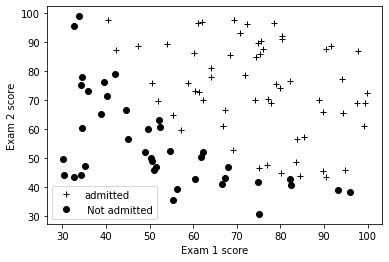

In [4]:
x1_raw, x2_raw, y = np.loadtxt("ex2data1.txt", dtype=np.float64, delimiter=",", unpack=True)

%matplotlib inline
x = np.vstack((x1_raw, x2_raw)).T

# adding column of ones
ones_c = np.ones((x.shape[0], 1), dtype=np.float64)
x = np.hstack((ones_c, x))


def plotRawData(x, y):
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)
    plt.figure()
    ax1 = plt.plot(x[pos, 1], x[pos, 2], "k+", label="admitted")
    ax1 = plt.plot(x[neg, 1], x[neg, 2], "ko", label=" Not admitted")
    ax1 = plt.legend()
    ax1 = plt.xlabel("Exam 1 score")
    ax1 = plt.ylabel("Exam 2 score")
    plt.show()


plotRawData(x, y)

In [5]:
x

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [6]:
def sigmoid(z):
    g = np.zeros(np.size(z))
    g = 1/(1 + np.exp(-z))
    return g

Text(0.5, 1.0, 'Sigmoid funtion')

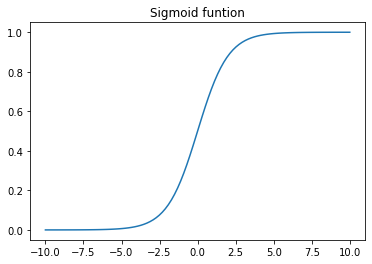

In [7]:
nums = np.linspace(-10, 10, num=100)

plt.figure()
plt.plot(nums, sigmoid(nums))
plt.title("Sigmoid funtion")

In [8]:
def costFunction(theta, x, y):
    m = np.size(y)
    J = 0
    h = sigmoid(x @ theta)
    J = ((-y).T @ np.log(h) - (1 - y).T @ np.log(1 - h))/m
    return J

In [9]:
def grad(theta, X, y):
    m = np.size(y)
    grad = np.zeros_like(theta)
    h = sigmoid(x @ theta)
    error = h - y
    grad = (x.T @ (h - y))/m
    return grad

In [10]:
test_theta = np.array([-24, 0.2, 0.2], dtype=np.float64)

J_test = costFunction(test_theta, x, y)
grad_test = grad(test_theta, x, y)

In [11]:
print("J = {}, grad = {}".format(J_test, grad_test))

J = 0.2183301938265977, grad = [0.04290299 2.56623412 2.64679737]


In [12]:
import scipy.optimize as opt

theta = np.zeros(3)
results = opt.fmin_tnc(func=costFunction, x0=theta, fprime=grad, args=(x, y))
print("Results = {}".format(results))
print("Cost = {}".format(costFunction(results[0], x, y)))

Results = (array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)
Cost = 0.20349770158947453


In [13]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(results[0])
predictions = predict(theta_min, x)
#print(predictions)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


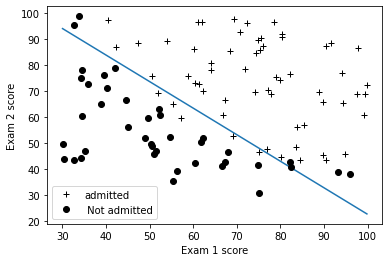

In [14]:
def plotDecisionBoundary(theta, x, y):

    x_min = np.min(x[:,1])
    x_max = np.max(x[:,1])
    plot_x = np.array([x_min, x_max])
    plot_y = -1/(theta[0,2]) * ((theta[0,1] * plot_x) + theta[0,0])
    
    plt.figure()
    plt.plot(plot_x, plot_y)
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)
    ax1 = plt.plot(x[pos, 1], x[pos, 2], "k+", label="admitted")
    ax1 = plt.plot(x[neg, 1], x[neg, 2], "ko", label=" Not admitted")
    ax1 = plt.legend()
    ax1 = plt.xlabel("Exam 1 score")
    ax1 = plt.ylabel("Exam 2 score")



plotDecisionBoundary(theta_min, x, y)